In [6]:
#Importing Dependancies
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [3]:
student_dataset = pd.read_csv('student-mat.csv',sep=';')
student_dataset = student_dataset[['G1','G2','G3','failures','absences']]
print(student_dataset)

     G1  G2  G3  failures  absences
0     5   6   6         0         6
1     5   5   6         0         4
2     7   8  10         3        10
3    15  14  15         0         2
4     6  10  10         0         4
..   ..  ..  ..       ...       ...
390   9   9   9         2        11
391  14  16  16         0         3
392  10   8   7         3         3
393  11  12  10         0         0
394   8   9   9         0         5

[395 rows x 5 columns]


In [4]:
predict = "G3"
X = np.array(student_dataset.drop([predict],axis =1))
y = np.array(student_dataset[predict])

In [24]:
best_acc = 0
for i in range(10000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X , y , test_size= 0.1)
    Ultron = linear_model.LinearRegression()
    Ultron.fit(x_train,y_train)
    accuracy = Ultron.score(x_test,y_test)
    if(accuracy>best_acc):
        best_acc=accuracy
        with open('Ultron_Model.pickle','wb') as f:
            pickle.dump(Ultron, f)
print("The Best Accuracy is : ",best_acc*100)

'\nbest_acc = 0\nfor i in range(10000):\n    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X , y , test_size= 0.1)\n    Ultron = linear_model.LinearRegression()\n    Ultron.fit(x_train,y_train)\n    accuracy = Ultron.score(x_test,y_test)\n    if(accuracy>best_acc):\n        best_acc=accuracy\n        with open(\'Ultron_Model.pickle\',\'wb\') as f:\n            pickle.dump(Ultron, f)\nprint("The Best Accuracy is : ",best_acc*100)\n'

In [25]:
pickle_in = open('Ultron_Model.pickle','rb')
Ultron = pickle.load(pickle_in)

In [26]:
print("Coefficients : ",Ultron.coef_)
print("Intercept : ",Ultron.intercept_)

Coefficients :  [ 0.14811804  0.98758744 -0.2432344   0.04012827]
Intercept :  -1.9597382154415257


In [27]:
predictions = Ultron.predict(x_test)
for i in range(len(predictions)):
    print("ULTRON's Predicted G3 - ",predictions[i],". Actual G3 - ",y_test[i],".")

ULTRON's Predicted G3 -  12.656315021104591 . Actual G3 -  13 .
ULTRON's Predicted G3 -  12.884689607124335 . Actual G3 -  13 .
ULTRON's Predicted G3 -  12.656315021104591 . Actual G3 -  14 .
ULTRON's Predicted G3 -  6.7420187460516345 . Actual G3 -  8 .
ULTRON's Predicted G3 -  16.291806055232776 . Actual G3 -  17 .
ULTRON's Predicted G3 -  13.792020503807407 . Actual G3 -  14 .
ULTRON's Predicted G3 -  7.527188383327385 . Actual G3 -  8 .
ULTRON's Predicted G3 -  13.21811085310955 . Actual G3 -  12 .
ULTRON's Predicted G3 -  15.223962063691147 . Actual G3 -  15 .
ULTRON's Predicted G3 -  15.223962063691147 . Actual G3 -  15 .
ULTRON's Predicted G3 -  11.74898412442152 . Actual G3 -  11 .
ULTRON's Predicted G3 -  10.533022094289429 . Actual G3 -  10 .
ULTRON's Predicted G3 -  9.101080534405686 . Actual G3 -  12 .
ULTRON's Predicted G3 -  11.289770193875652 . Actual G3 -  12 .
ULTRON's Predicted G3 -  12.205733296461007 . Actual G3 -  13 .
ULTRON's Predicted G3 -  12.19039513528256 . A

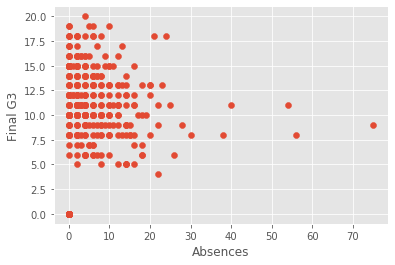

In [20]:
style.use("ggplot")
plt.scatter(student_dataset['absences'],student_dataset['G3'])
plt.xlabel('Absences')
plt.ylabel('Final G3')
plt.show()